# Compare Sectors

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd 

%matplotlib inline

In [2]:
data_dir = os.path.abspath('../database/fit')
print(f'Opening files from {data_dir}')

Opening files from /Users/davidriser/repos/python-analysis/kaon-bsa/database/fit


In [3]:
latex_labels = {
    'x':'$x$',
    'pt':'$P_{T}$',
    'q2':'$Q^2$',
    'z':'$z$'
}

In [4]:
data = {} 

for sect in range(1,7):
    data[sect] = pd.read_csv(f'{data_dir}/bootstrap_est_sector_{sect}.csv')
    data[sect]['sector'] = np.repeat(sect, len(data[sect]))
    print(f'Loaded sector {sect} with {len(data[sect])} entries.')

Loaded sector 1 with 20 entries.
Loaded sector 2 with 20 entries.
Loaded sector 3 with 20 entries.
Loaded sector 4 with 20 entries.
Loaded sector 5 with 20 entries.
Loaded sector 6 with 20 entries.


In [5]:
analysis_shape = (len(data[1]),6)
values = np.empty(shape=analysis_shape)
errors = np.empty(shape=analysis_shape)
axis = np.empty(shape=analysis_shape)
variable = np.empty(shape=(len(data[1])))

In [6]:
for sect in range(1,7):
    values[:,sect-1] = data[sect]['par_0']
    errors[:,sect-1] = data[sect]['err_0']
    axis[:,sect-1] = data[sect]['axis_min'] + 0.5 * (data[sect]['axis_max'] - data[sect]['axis_min'])

variable = data[1]['axis']

In [7]:
weights = 1. / errors**2
mu = np.average(values, axis=1, weights=weights)
mu_matrix = np.zeros(shape=(len(mu),6))

for i in range(6):
    mu_matrix[:,i] = mu

In [8]:
shifted_values = (values - mu_matrix)

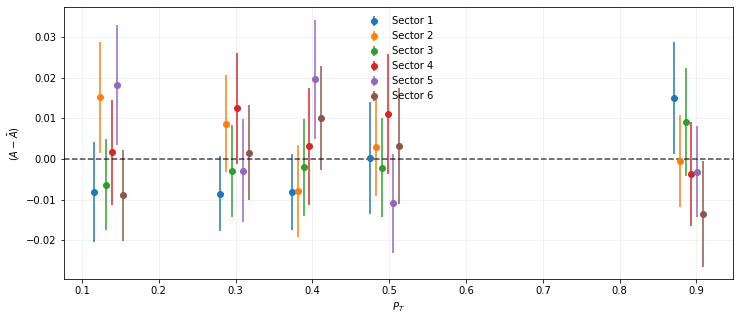

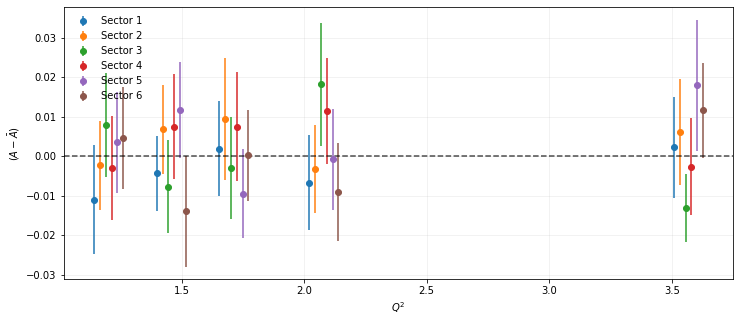

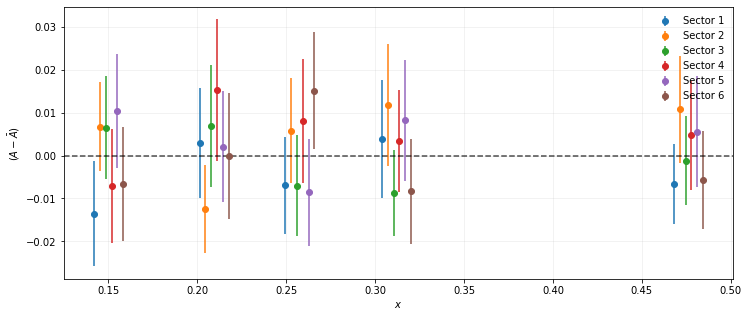

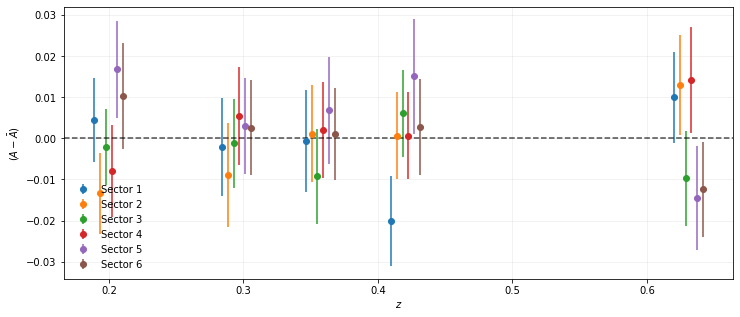

In [9]:

n_axis_bins = 5
n_axes = 4

for iaxis in range(n_axes):
    start = n_axis_bins * iaxis
    stop = n_axis_bins * (iaxis + 1)
    shift = (axis[stop-1,0] - axis[start,0]) / 100.
    
    plt.figure(figsize=(12,5))
    for i in range(6):
        plt.errorbar(axis[start:stop,i] + i * shift, shifted_values[start:stop,i], errors[start:stop,i],
                    marker='o', linestyle='', label='Sector {}'.format(i+1))
    
    plt.axhline(0., linestyle='--', color='k', alpha=0.7)
    plt.xlabel(latex_labels[variable[start]])
    plt.ylabel('$(A - \\bar{A})$')
    plt.grid(alpha=0.2)
    plt.legend(frameon=False)
    plt.savefig('../image/alu_sin_compare_sectors_{}.pdf'.format(variable[start]), 
                bbox_inches='tight')

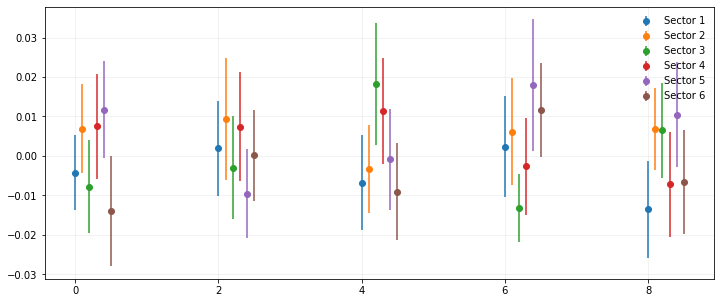

In [12]:
plt.figure(figsize=(12,5))
for i in range(6):
    plt.errorbar(2 * np.arange(5) + i * 0.1, shifted_values[6:11,i], errors[6:11,i],
                marker='o', linestyle='', label='Sector {}'.format(i+1))

plt.grid(alpha=0.2)
plt.legend(frameon=False)

In [13]:
chi2 = shifted_values**2 / errors**2 

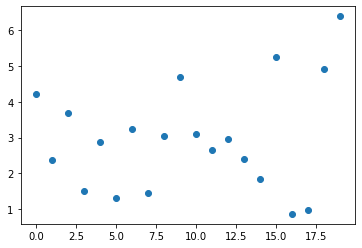

In [14]:
plt.plot(chi2.sum(axis=1), marker='o', linestyle='')

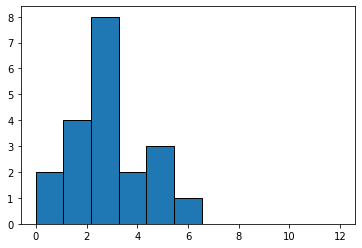

In [15]:
plt.hist(chi2.sum(axis=1), edgecolor='k', bins=np.linspace(0,12,12));

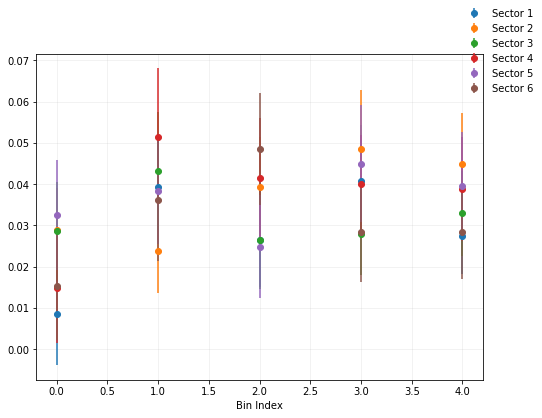

In [16]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)
for sect in range(1,7):
    xdf = data[sect][data[sect]['axis'] == "x"]
    ax.errorbar(xdf['axis_bin'], xdf['par_0'], xdf['err_0'], marker='o',
                linestyle='', label=f'Sector {sect}')
    ax.set_xlabel('Bin Index')
    
ax.grid(alpha=0.2)
fig.legend(frameon=False)    

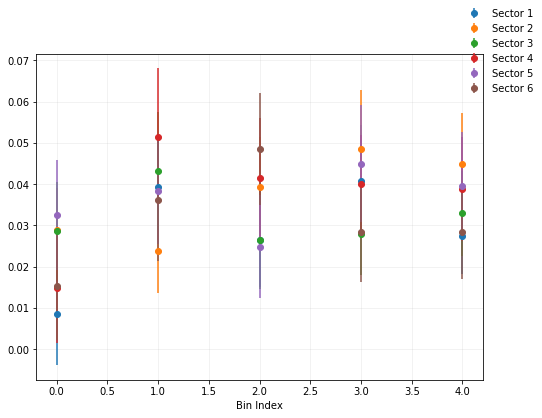

In [5]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)
for sect in range(1,7):
    df = data[sect][data[sect]['axis'] == "x"]
    ax.errorbar(df['axis_bin'], df['par_0'], df['err_0'], marker='o',
                linestyle='', label=f'Sector {sect}')
    ax.set_xlabel('Bin Index')
    
ax.grid(alpha=0.2)
fig.legend(frameon=False) 

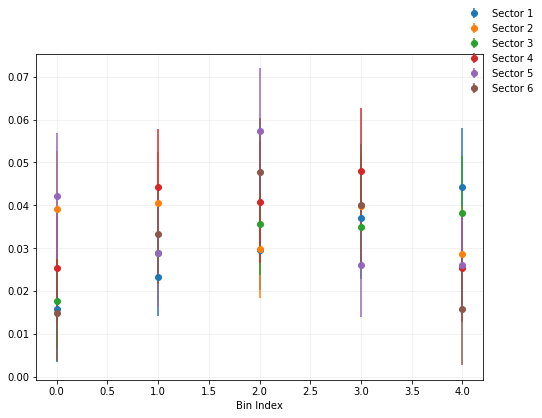

In [6]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)
for sect in range(1,7):
    df = data[sect][data[sect]['axis'] == "pt"]
    ax.errorbar(df['axis_bin'], df['par_0'], df['err_0'], marker='o',
                linestyle='', label=f'Sector {sect}')
    ax.set_xlabel('Bin Index')
    
ax.grid(alpha=0.2)
fig.legend(frameon=False) 

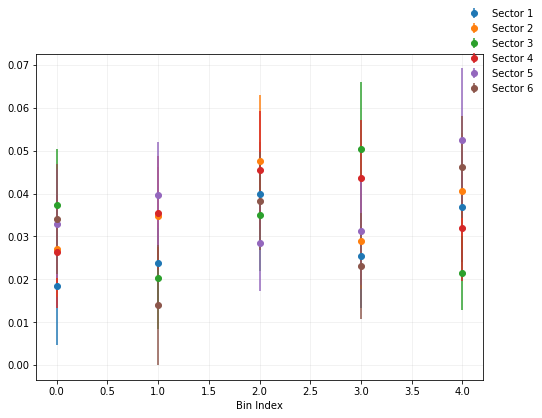

In [7]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)
for sect in range(1,7):
    df = data[sect][data[sect]['axis'] == "q2"]
    ax.errorbar(df['axis_bin'], df['par_0'], df['err_0'], marker='o',
                linestyle='', label=f'Sector {sect}')
    ax.set_xlabel('Bin Index')
    
ax.grid(alpha=0.2)
fig.legend(frameon=False) 

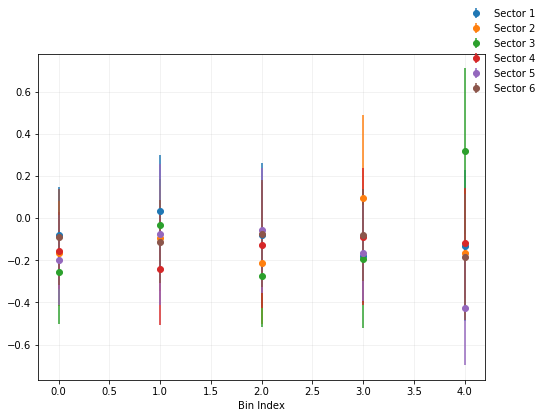

In [8]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)
for sect in range(1,7):
    df = data[sect][data[sect]['axis'] == "q2"]
    ax.errorbar(df['axis_bin'], df['par_2'], df['err_2'], marker='o',
                linestyle='', label=f'Sector {sect}')
    ax.set_xlabel('Bin Index')
    
ax.grid(alpha=0.2)
fig.legend(frameon=False)

In [9]:
sector_data = pd.concat([data[i] for i in range(1,7)])

In [10]:
sector_data

,axis,axis_bin,axis_min,axis_max,par_0,par_1,par_2,err_0,err_1,err_2,bootstraps_0,bootstraps_1,bootstraps_2,sector
0,pt,0,0.000488,0.231421,0.015701,-0.146802,-0.074236,0.012356,0.235964,0.186264,[ 0.03124897 0.02829139 0.00833879 0.022427...,[ 6.84409142e-02 -1.45712309e-02 -5.49566410e-...,[ 1.39028411e-02 3.34073544e-01 6.04966395e-...,1
1,pt,1,0.231421,0.328229,0.023356,0.016904,0.087780,0.009226,0.285851,0.319669,[-0.00158918 0.01776274 0.02683593 0.020296...,[ 6.00805366e-03 6.43558443e-01 -1.20903403e-...,[-1.89590100e-02 -6.00700974e-01 9.71170887e-...,1
2,pt,2,0.328229,0.418657,0.029647,-0.148524,0.104191,0.009367,0.296226,0.319690,[0.04668178 0.02880074 0.02769149 0.03940344 0...,[-6.80419028e-01 -1.58309653e-01 -1.66047975e-...,[-0.609938 0.23926821 -0.01473952 0.189082...,1
3,pt,3,0.418657,0.531942,0.037083,-0.024046,-0.249698,0.013772,0.415650,0.301267,[0.03630608 0.03135587 0.01421535 0.05299222 0...,[ 1.82820112e-01 -5.30749820e-02 8.70150566e-...,[-2.41406009e-01 2.13994347e-02 -5.23811996e-...,1
4,pt,4,0.531942,1.209456,0.044243,-0.193977,-0.375555,0.013754,0.366335,0.272230,[0.0335573 0.01611988 0.03281363 0.0519656 0...,[-0.7752292 0.7398291 -0.12470063 -0.846639...,[-0.601401 -0.6517537 -0.21424161 -0.572981...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,z,0,0.127442,0.250747,0.032812,-0.155141,-0.358700,0.012934,0.323299,0.275528,[0.03253049 0.05472665 0.01052954 0.02787553 0...,[ 1.52554782e-02 8.05398747e-02 -1.10607132e-...,[ 0.00526097 -0.72554284 0.01021898 -0.444255...,6
16,z,1,0.250747,0.317319,0.039303,-0.269449,-0.144172,0.011579,0.309810,0.255252,[0.04763737 0.05746632 0.03279801 0.03842339 0...,[-0.7827636 -0.28397208 -0.1660448 -0.338626...,[-0.57349944 -0.10179219 0.19862844 -0.001443...,6
17,z,2,0.317319,0.375333,0.036655,-0.286420,-0.083112,0.011205,0.322210,0.253421,[0.01648741 0.03926523 0.02001964 0.04811078 0...,[ 0.6957734 -0.3076942 -0.02684417 -0.405770...,[-6.18812203e-01 3.38831171e-03 3.87135185e-...,6
18,z,3,0.375333,0.444267,0.035736,-0.034600,-0.133605,0.011773,0.370658,0.285446,[0.03850259 0.03748841 0.02241914 0.02388179 0...,[ 2.03302667e-01 -1.47820199e-02 -7.05539167e-...,[ 0.11228427 0.04024483 -0.5919508 -0.053319...,6


In [11]:
sector_stats = sector_data.groupby(['axis', 'axis_bin']).aggregate({
    'par_0' : [np.mean, np.var],
    'par_1' : [np.mean, np.std],
    'par_2' : [np.mean, np.std]
}).reset_index()
sector_stats.columns = ['axis', 'axis_bin', 'par_0_mean', 'par_0_std', 'par_1_mean',
                       'par_1_std', 'par_2_mean', 'par_2_std']

In [12]:
sector_stats

,axis,axis_bin,par_0_mean,par_0_std,par_1_mean,par_1_std,par_2_mean,par_2_std
0,pt,0,0.025782,0.000146,-0.060363,0.084424,-0.137565,0.117057
1,pt,1,0.033236,0.000062,-0.043156,0.120731,-0.096680,0.131135
2,pt,2,0.040142,0.000117,-0.115490,0.103789,-0.139914,0.131946
3,pt,3,0.037639,0.000052,-0.136309,0.085058,-0.141075,0.083097
4,pt,4,0.029730,0.000102,-0.070792,0.123579,-0.142367,0.116015
5,q2,0,0.029431,0.000046,-0.092301,0.116920,-0.157588,0.065134
6,q2,1,0.028027,0.000103,-0.093177,0.114813,-0.087464,0.091584
7,q2,2,0.039102,0.000048,0.004567,0.104681,-0.136928,0.086901
8,q2,3,0.033785,0.000117,-0.133624,0.057409,-0.101433,0.108097
9,q2,4,0.038253,0.000119,-0.078877,0.116136,-0.117467,0.240889


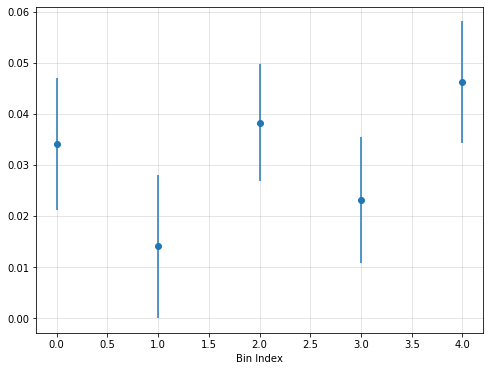

In [13]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)

df = data[sect][data[sect]['axis'] == "q2"]
ax.errorbar(df['axis_bin'], df['par_0'], df['err_0'], marker='o', 
            linestyle='')
ax.set_xlabel('Bin Index')
ax.grid(alpha=0.4)

In [14]:
def max_likelihood_mean(x, x_err):
    return np.sum(x / x_err**2) / np.sum(1.0 / x_err**2)

In [15]:
sector_stats = sector_data.groupby(['axis', 'axis_bin']).aggregate({
    'par_0' : list,
    'err_0' : list
}).reset_index()

In [16]:
sector_stats['par_0'] = sector_stats['par_0'].apply(lambda x: np.array(x))
sector_stats['err_0'] = sector_stats['err_0'].apply(lambda x: np.array(x))
sector_stats['max_likelihood_mean_0'] = sector_stats.apply(
    lambda r: max_likelihood_mean(r['par_0'], r['err_0']), axis=1)

In [17]:
sector_stats

,axis,axis_bin,par_0,err_0,max_likelihood_mean_0
0,pt,0,"[0.015701057389378548, 0.039039112627506256, 0...","[0.012356426566839218, 0.013626552186906338, 0...",0.023821
1,pt,1,"[0.023355629295110703, 0.040549077093601234, 0...","[0.00922562088817358, 0.011805564165115356, 0....",0.031838
2,pt,2,"[0.029646681621670726, 0.029823416844010357, 0...","[0.00936689879745245, 0.011348037980496885, 0....",0.037699
3,pt,3,"[0.037082888185977936, 0.039790462702512734, 0...","[0.013771514408290386, 0.01185517106205225, 0....",0.036932
4,pt,4,"[0.044243082404136665, 0.028637990355491638, 0...","[0.013754437677562237, 0.01129095908254385, 0....",0.029166
5,q2,0,"[0.01851353421807289, 0.027166014537215236, 0....","[0.013739302754402159, 0.011211192235350607, 0...",0.029524
6,q2,1,"[0.02373107150197029, 0.034871652722358704, 0....","[0.009502937085926531, 0.011271119117736816, 0...",0.028020
7,q2,2,"[0.03993145376443863, 0.047497600317001336, 0....","[0.01206887234002352, 0.015437381342053412, 0....",0.038036
8,q2,3,"[0.025410974398255348, 0.02887395024299622, 0....","[0.012022119015455246, 0.011228103190660477, 0...",0.032173
9,q2,4,"[0.03684747219085693, 0.040661990642547614, 0....","[0.012809816747903824, 0.01353944931179285, 0....",0.034557


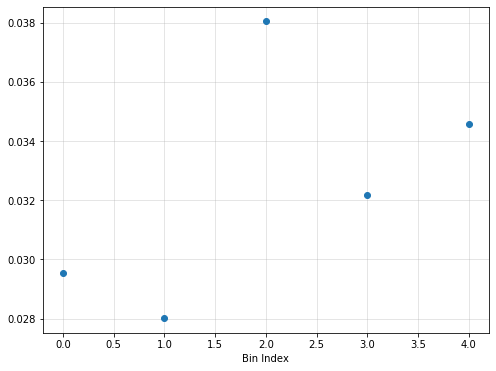

In [18]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)

df = sector_stats[sector_stats['axis'] == "q2"]
ax.plot(df['axis_bin'], df['max_likelihood_mean_0'], marker='o', 
            linestyle='')
ax.set_xlabel('Bin Index')
ax.grid(alpha=0.4)

In [19]:
sector_stats[sector_stats['axis'] == "x"].apply(
    lambda row: np.sqrt(np.mean((row['par_0'] - row['max_likelihood_mean_0'])**2)), 
    axis=1)

10    0.008916
11    0.008655
12    0.009103
13    0.007934
14    0.006425
dtype: float64

In [20]:
sector_stats[sector_stats['axis'] == "x"].apply(
    lambda row: np.sqrt(np.mean((row['par_0'] - np.mean(row['par_0']))**2)), 
    axis=1)

10    0.008895
11    0.008306
12    0.009036
13    0.007751
14    0.006303
dtype: float64

In [21]:
rmse = sector_stats.apply(
    lambda row: np.sqrt(np.mean((row['par_0'] - row['max_likelihood_mean_0'])**2)), 
    axis=1)

In [22]:
sector_stats['rmse'] = rmse

In [23]:
sector_stats

,axis,axis_bin,par_0,err_0,max_likelihood_mean_0,rmse
0,pt,0,"[0.015701057389378548, 0.039039112627506256, 0...","[0.012356426566839218, 0.013626552186906338, 0...",0.023821,0.011199
1,pt,1,"[0.023355629295110703, 0.040549077093601234, 0...","[0.00922562088817358, 0.011805564165115356, 0....",0.031838,0.007322
2,pt,2,"[0.029646681621670726, 0.029823416844010357, 0...","[0.00936689879745245, 0.011348037980496885, 0....",0.037699,0.010188
3,pt,3,"[0.037082888185977936, 0.039790462702512734, 0...","[0.013771514408290386, 0.01185517106205225, 0....",0.036932,0.006630
4,pt,4,"[0.044243082404136665, 0.028637990355491638, 0...","[0.013754437677562237, 0.01129095908254385, 0....",0.029166,0.009241
5,q2,0,"[0.01851353421807289, 0.027166014537215236, 0....","[0.013739302754402159, 0.011211192235350607, 0...",0.029524,0.006209
6,q2,1,"[0.02373107150197029, 0.034871652722358704, 0....","[0.009502937085926531, 0.011271119117736816, 0...",0.028020,0.009256
7,q2,2,"[0.03993145376443863, 0.047497600317001336, 0....","[0.01206887234002352, 0.015437381342053412, 0....",0.038036,0.006425
8,q2,3,"[0.025410974398255348, 0.02887395024299622, 0....","[0.012022119015455246, 0.011228103190660477, 0...",0.032173,0.010025
9,q2,4,"[0.03684747219085693, 0.040661990642547614, 0....","[0.012809816747903824, 0.01353944931179285, 0....",0.034557,0.010617
